# Result analysis of empirical experiment

Unless specified otherwise, the two groups in the following analyses are always 'with DFD' and 'without DFD', i.e. the participants' results when provided a DFD are compared against their results when no DFD was provided to them.

### Statistical tests used
In each of the groups, two tests are performed:

**1. Shapiro-Wilk** test to check whether difference between sample scores follows a normal distribution and thus whether t-test can be used. (From [scipy docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html): "The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution."). Input is vector of paired differences bewteen the two groups.
The following parameters are used:
- H0: the difference is normally distributed 
- H1: the difference is not normally distributed 
- alpha value 0.05

**2. Wilcoxon-Mann-Whitney** test to check for statistically significant differences between the two groups. 
The paired Wilcoxon-Mann-Whitney is an alternative to the more often used student t-test that works on non-normally distributed sample sets. It is used since none of the Shapiro-Wilk tests below indicate normally distributed sample sets.
([scipy docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html)).
The following parameters re used:
- H0: there is no statistically significant difference between the two groups' distributions \
- H1: there is a statistically significant difference between the two groups' distributions \
- alpha value 0.05

# Load data

Load the participants' answers (already quantified) into separate dataframes for with DFD and without DFD.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [5]:
xls = pd.ExcelFile('results.xlsx')
df_dfd = pd.read_excel(xls, 'model-supported condition')[:24]
df_no_dfd = pd.read_excel(xls, 'control condition')[:24]
df_questionnaire = pd.read_excel(xls, 'Questionnaire')[:24]

# for overall scores, sum up single tasks
df_dfd_overall_score = df_dfd["Task1_analysis_correctness"] + df_dfd["Task2_analysis_correctness"] + df_dfd["Task3_analysis_correctness"] + df_dfd["Task4_analysis_correctness"] + df_dfd["Task5_analysis_correctness"] + df_dfd["Task6_analysis_correctness"]
df_no_dfd_overall_score = df_no_dfd["Task1_analysis_correctness"] + df_no_dfd["Task2_analysis_correctness"]+ df_no_dfd["Task3_analysis_correctness"] + df_no_dfd["Task4_analysis_correctness"] + df_no_dfd["Task5_analysis_correctness"] + df_no_dfd["Task6_analysis_correctness"]

df_dfd_overall_evidence = df_dfd["Task1_correctness_of_evidence"] + df_dfd["Task2_correctness_of_evidence"] + df_dfd["Task3_correctness_of_evidence"] + df_dfd["Task4_correctness_of_evidence"] + df_dfd["Task5_correctness_of_evidence"] + df_dfd["Task6_correctness_of_evidence"]
df_no_dfd_overall_evidence = df_no_dfd["Task1_correctness_of_evidence"] + df_no_dfd["Task2_correctness_of_evidence"]+ df_no_dfd["Task3_correctness_of_evidence"] + df_no_dfd["Task4_correctness_of_evidence"] + df_no_dfd["Task5_correctness_of_evidence"] + df_no_dfd["Task6_correctness_of_evidence"]

# Participants

**Knowledge about microservice architecture**

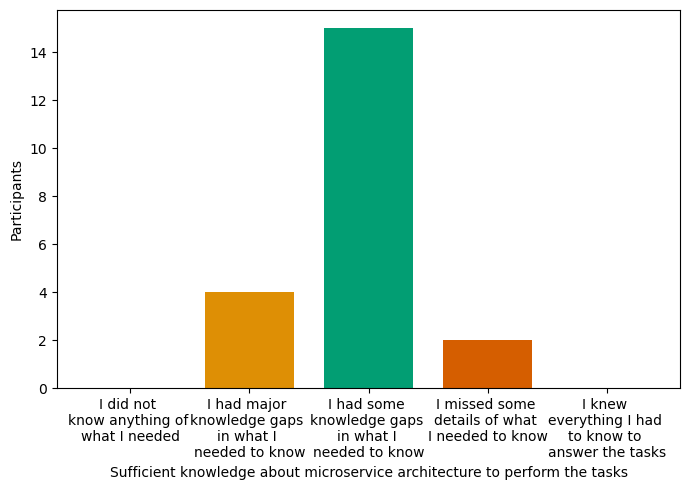

In [232]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D


value_counts = df_dfd["arch"].value_counts().sort_index()

labels = ("I did not \nknow anything of \nwhat I needed", 
          "I had major \nknowledge gaps \nin what I \nneeded to know", 
          "I had some \nknowledge gaps \nin what I \nneeded to know", 
          "I missed some \ndetails of what \nI needed to know", 
          "I knew \neverything I had \nto know to \nanswer the tasks")

scores = [0, 
          value_counts[2], 
          value_counts[3],
          value_counts[4],
          0]

# Choose a color palette
palette = sns.color_palette("colorblind")

fig, ax = plt.subplots(figsize=(7, 5))

num_tasks = len(labels)

bar_width = 0.3  # Adjust the width of the bars

# Create an array with positions for the bars
positions = np.arange(0, num_tasks * 0.4, 0.4)

# Create the bars
ax.bar(positions, scores, bar_width, color=palette)

# Set axis labels
ax.set_xlabel("Sufficient knowledge about microservice architecture to perform the tasks")
ax.set_ylabel("Participants")

# Update x-axis tick positions and labels
ax.set_xticks(positions)
ax.set_xticklabels(labels)

plt.tight_layout()
plt.savefig("sufficient_knowledge.png", dpi=900)
plt.show()

**Work experience**

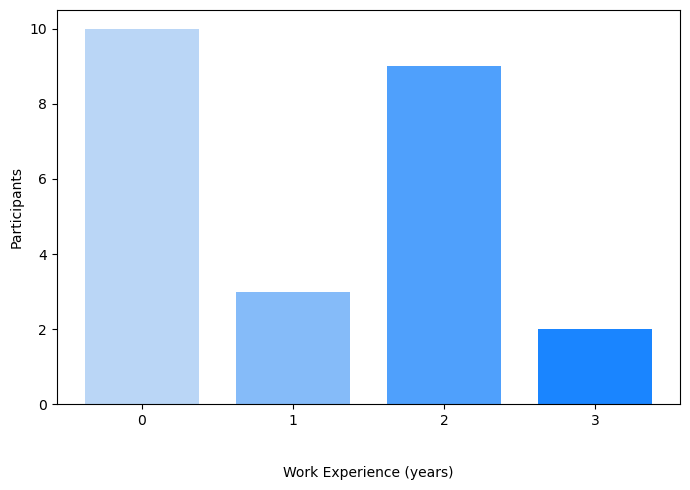

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D


value_counts = df_questionnaire["Work experience"].value_counts().sort_index()

labels = ("0\n\n", "1", "2", "3")

scores = [value_counts[0], 
          value_counts[1], 
          value_counts[2],
          value_counts[3]]

# Choose a color palette
palette = sns.light_palette("#1A85FF", 5)[1:]

fig, ax = plt.subplots(figsize=(7, 5))

num_tasks = len(labels)

bar_width = 0.3  # Adjust the width of the bars

# Create an array with positions for the bars
positions = np.arange(0, num_tasks * 0.4, 0.4)

# Create the bars
ax.bar(positions, scores, bar_width, color=palette)

# Set axis labels
ax.set_xlabel("Work Experience (years)")
ax.set_ylabel("Participants")

# Update x-axis tick positions and labels
ax.set_xticks(positions)
ax.set_xticklabels(labels)

plt.tight_layout()
plt.savefig("work_experience.png", dpi=900)
plt.show()

In [89]:
print("Average work experience in years: ", df_questionnaire["Work experience"].mean())

Average work experience in years:  1.125


**Programming experience**

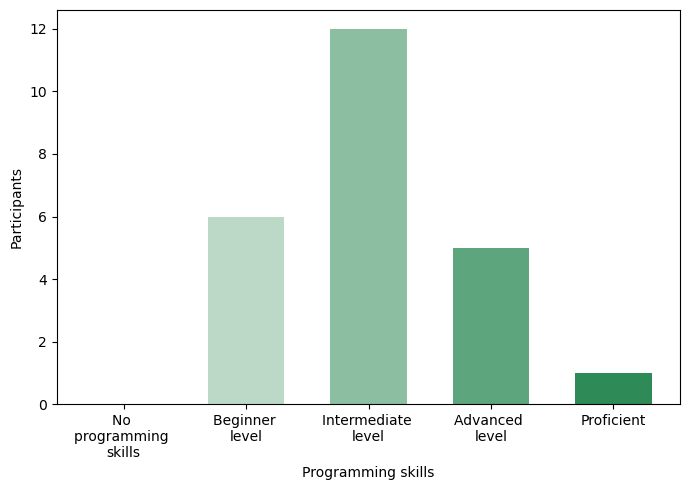

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D


value_counts = df_questionnaire["Programming skill"].value_counts().sort_index()

labels = ("No \nprogramming \nskills", 
          "Beginner \nlevel", 
          "Intermediate \nlevel", 
          "Advanced \nlevel", 
          "Proficient")

scores = [0, 
          value_counts[2], 
          value_counts[3],
          value_counts[4],
          value_counts[5]]

# Choose a color palette
palette = sns.light_palette("seagreen", 5)

fig, ax = plt.subplots(figsize=(7, 5))

num_tasks = len(labels)

bar_width = 0.5  # Adjust the width of the bars

# Create an array with positions for the bars
positions = np.arange(0, num_tasks * 0.8, 0.8)

# Create the bars
ax.bar(positions, scores, bar_width, color=palette)

# Set axis labels
ax.set_xlabel("Programming skills")
ax.set_ylabel("Participants")

# Update x-axis tick positions and labels
ax.set_xticks(positions)
ax.set_xticklabels(labels)#, rotation=60)

plt.tight_layout()
plt.savefig("programming_skills.png", dpi=900)
plt.show()

**Java reading experience**

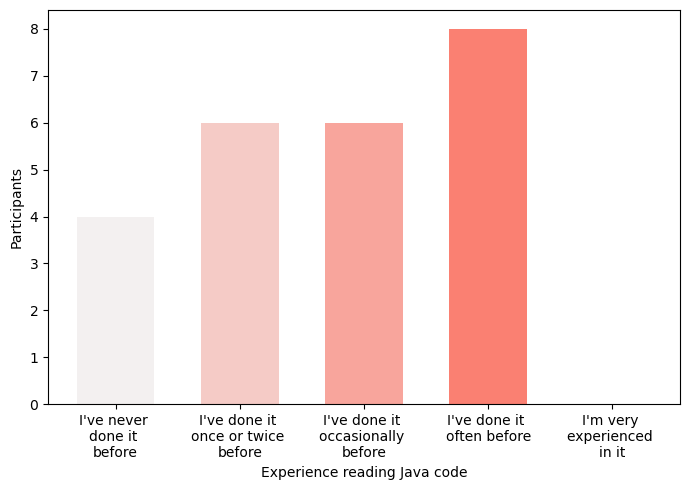

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D


value_counts = df_questionnaire["Reading Java code experience"].value_counts().sort_index()

labels = ("I've never \ndone it \nbefore", 
          "I've done it \nonce or twice \nbefore", 
          "I've done it \noccasionally \nbefore", 
          "I've done it \noften before", 
          "I'm very \nexperienced \nin it")

scores = [value_counts[1], 
          value_counts[2], 
          value_counts[3],
          value_counts[4],
          0]

# Choose a color palette
palette = sns.light_palette("salmon", 4)

fig, ax = plt.subplots(figsize=(7, 5))

num_tasks = len(labels)

bar_width = 0.5  # Adjust the width of the bars

# Create an array with positions for the bars
positions = np.arange(0, num_tasks * 0.8, 0.8)

# Create the bars
ax.bar(positions, scores, bar_width, color=palette)

# Set axis labels
ax.set_xlabel("Experience reading Java code")
ax.set_ylabel("Participants")

# Update x-axis tick positions and labels
ax.set_xticks(positions)
ax.set_xticklabels(labels)#, rotation=60)

plt.tight_layout()
plt.savefig("java_reading_experience.png", dpi=900)
plt.show()

# Analysis

Define mapping from scales to scores (for "which resource did you use" and "how much did resource help").

In [4]:
resource_scale = {0: "None or could not answer", 1: "Documentation", 2: "Source Code", 3: "Dataflow Diagram", 4: "Traceability"}
helpfulness_scale = {1: "No help at all", 2: "Slight help", 3: "Good help", 4: "Major help", 5: "I used it almost exclusively"}

### Overall

**Shapiro-Wilk**

In [125]:
diff = df_dfd_overall_score - df_no_dfd_overall_score
result = stats.shapiro(diff)
print("Calculated p-value is", format(result.pvalue, "f"))


Calculated p-value is 0.193148


Could use t-test here

**Score**

In [5]:
result = stats.wilcoxon(df_dfd_overall_score, df_no_dfd_overall_score)
print(result)
avg_score_dfd_overall = df_dfd_overall_score.mean()
avg_score_no_dfd_overall = df_no_dfd_overall_score.mean()
print("\nAverage score with DFD: ", avg_score_dfd_overall)
print("Average score without DFD: ", avg_score_no_dfd_overall)
print(f"Increase of: {((avg_score_dfd_overall / avg_score_no_dfd_overall) - 1) * 100}%")

WilcoxonResult(statistic=34.0, pvalue=0.002475768009299668)

Average score with DFD:  6.75
Average score without DFD:  4.791666666666667
Increase of: 40.86956521739129%


/Users/simon/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


**Evidence**

In [6]:
result = stats.wilcoxon(df_dfd_overall_evidence, df_no_dfd_overall_evidence)
print(result)
avg_evidence_dfd_overall = df_dfd_overall_evidence.mean()
avg_evidence_no_dfd_overall = df_no_dfd_overall_evidence.mean()
print("\nAverage evidence with DFD: ", avg_evidence_dfd_overall)
print("Average evidence without DFD: ", avg_evidence_no_dfd_overall)
print(f"Increase of: {((avg_evidence_dfd_overall / avg_evidence_no_dfd_overall) - 1) * 100}%")

WilcoxonResult(statistic=71.0, pvalue=0.5214391027309827)

Average evidence with DFD:  2.7083333333333335
Average evidence without DFD:  3.0833333333333335
Increase of: -12.16216216216216%


**Time**

In [41]:
avg_time_dfd = df_dfd["Time (minutes)"].mean()
avg_time_no_dfd = df_no_dfd["Time (minutes)"].mean()
print("Average time with DFD: ", avg_time_dfd)
print("Average time without DFD: ", avg_time_no_dfd)

Average time with DFD:  35.42857142857143
Average time without DFD:  33.56521739130435


### Task 1 performance

**Shapiro-Wilk**

In [56]:
diff = df_dfd["Task1_analysis_correctness"] - df_no_dfd["Task1_analysis_correctness"]
result = stats.shapiro(diff)
print("Calculated p-value is", format(result.pvalue, "f"))

Calculated p-value is 0.000054


The p-value of ~0.00005 is << 0.05, thus the null hypothesis is rejected. The difference between the scores does not follow a normal distribution. The student t-test can not be applied.

**Score**

In [7]:
result = stats.wilcoxon(df_dfd["Task1_analysis_correctness"], df_no_dfd["Task1_analysis_correctness"])
print(result)
avg_score_dfd_task1 = df_dfd["Task1_analysis_correctness"].mean()
avg_score_no_dfd_task1 = df_no_dfd["Task1_analysis_correctness"].mean()
print("\nAverage score with DFD: ", avg_score_dfd_task1)
print("Average score without DFD: ", avg_score_no_dfd_task1)
print(f"Increase of: {((avg_score_dfd_task1 / avg_score_no_dfd_task1) - 1) * 100}%")

WilcoxonResult(statistic=10.0, pvalue=0.0955807045456294)

Average score with DFD:  0.8333333333333334
Average score without DFD:  0.625
Increase of: 33.33333333333335%


/Users/simon/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


**Evidence**

In [6]:
result = stats.wilcoxon(df_dfd["Task1_correctness_of_evidence"], df_no_dfd["Task1_correctness_of_evidence"])
print(result)
avg_evidence_dfd_task1 = df_dfd["Task1_correctness_of_evidence"].mean()
avg_evidence_no_dfd_task1 = df_no_dfd["Task1_correctness_of_evidence"].mean()
print("\nAverage with DFD: ", avg_evidence_dfd_task1)
print("Average evidence without DFD: ", avg_evidence_no_dfd_task1)
print(f"Increase of: {((avg_evidence_dfd_task1 / avg_evidence_no_dfd_task1) - 1) * 100}%")

WilcoxonResult(statistic=30.0, pvalue=0.763024600552995)

Average with DFD:  0.625
Average evidence without DFD:  0.5833333333333334
Increase of: 7.14285714285714%


/Users/simon/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


### Task 2

**Shapiro-Wilk**

In [65]:
diff = df_dfd["Task2_analysis_correctness"] - df_no_dfd["Task2_analysis_correctness"]
result = stats.shapiro(diff)
print("Calculated p-value is", format(result.pvalue, "f"))

Calculated p-value is 0.000002


**Score**

In [8]:
result = stats.wilcoxon(df_dfd["Task2_analysis_correctness"], df_no_dfd["Task2_analysis_correctness"])
print(result)
avg_score_dfd_task2 = df_dfd["Task2_analysis_correctness"].mean()
avg_score_no_dfd_task2 = df_no_dfd["Task2_analysis_correctness"].mean()
print("\nAverage score with DFD: ", avg_score_dfd_task2)
print("Average score without DFD: ", avg_score_no_dfd_task2)
print(f"Increase of: {((avg_score_dfd_task2 / avg_score_no_dfd_task2) - 1) * 100}%")

WilcoxonResult(statistic=6.0, pvalue=0.6547208460185769)

Average score with DFD:  0.4583333333333333
Average score without DFD:  0.4166666666666667
Increase of: 9.999999999999986%


**Evidence**

In [9]:
result = stats.wilcoxon(df_dfd["Task2_correctness_of_evidence"], df_no_dfd["Task2_correctness_of_evidence"])
print(result)
avg_evidence_dfd_task2 = df_dfd["Task2_correctness_of_evidence"].mean()
avg_evidence_no_dfd_task2 = df_no_dfd["Task2_correctness_of_evidence"].mean()
print("\nAverage with DFD: ", avg_evidence_dfd_task2)
print("Average evidence without DFD: ", avg_evidence_no_dfd_task2)
print(f"Increase of: {((avg_evidence_dfd_task2 / avg_evidence_no_dfd_task2) - 1) * 100}%")

WilcoxonResult(statistic=7.0, pvalue=0.4142161782425253)

Average with DFD:  0.2916666666666667
Average evidence without DFD:  0.375
Increase of: -22.22222222222222%


### Task 3

**Shapiro-Wilk**

In [16]:
diff = df_dfd["Task3_analysis_correctness"] - df_no_dfd["Task3_analysis_correctness"]
result = stats.shapiro(diff)
print("Calculated p-value is", format(result.pvalue, "f"))

Calculated p-value is 0.004805


**Score**

In [10]:
result = stats.wilcoxon(df_dfd["Task3_analysis_correctness"], df_no_dfd["Task3_analysis_correctness"])
print(result)
avg_score_dfd_task3 = df_dfd["Task3_analysis_correctness"].mean()
avg_score_no_dfd_task3 = df_no_dfd["Task3_analysis_correctness"].mean()
print("\nAverage score with DFD: ", avg_score_dfd_task3)
print("Average score without DFD: ", avg_score_no_dfd_task3)
print(f"Increase of: {((avg_score_dfd_task3 / avg_score_no_dfd_task3) - 1) * 100}%")

WilcoxonResult(statistic=7.0, pvalue=0.0003360195026145452)

Average score with DFD:  1.75
Average score without DFD:  0.875
Increase of: 100.0%


**Evidence**

In [11]:
result = stats.wilcoxon(df_dfd["Task3_correctness_of_evidence"], df_no_dfd["Task3_correctness_of_evidence"])
print(result)
avg_evidence_dfd_task3 = df_dfd["Task3_correctness_of_evidence"].mean()
avg_evidence_no_dfd_task3 = df_no_dfd["Task3_correctness_of_evidence"].mean()
print("\nAverage with DFD: ", avg_evidence_dfd_task3)
print("Average evidence without DFD: ", avg_evidence_no_dfd_task3)
print(f"Increase of: {((avg_evidence_dfd_task3 / avg_evidence_no_dfd_task3) - 1) * 100}%")

WilcoxonResult(statistic=13.0, pvalue=0.8623197383894363)

Average with DFD:  0.5833333333333334
Average evidence without DFD:  0.5416666666666666
Increase of: 7.692307692307709%


### Task 4

**Shapiro-Wilk**

In [61]:
diff = df_dfd["Task4_analysis_correctness"] - df_no_dfd["Task4_analysis_correctness"]
result = stats.shapiro(diff)
print("Calculated p-value is", format(result.pvalue, "f"))

Calculated p-value is 0.002258


**Score**

In [12]:
result = stats.wilcoxon(df_dfd["Task4_analysis_correctness"], df_no_dfd["Task4_analysis_correctness"])
print(result)
avg_score_dfd_task4 = df_dfd["Task4_analysis_correctness"].mean()
avg_score_no_dfd_task4 = df_no_dfd["Task4_analysis_correctness"].mean()
print("\nAverage score with DFD: ", avg_score_dfd_task4)
print("Average score without DFD: ", avg_score_no_dfd_task4)
print(f"Increase of: {((avg_score_dfd_task4 / avg_score_no_dfd_task4) - 1) * 100}%")

WilcoxonResult(statistic=20.5, pvalue=0.06862318401276875)

Average score with DFD:  1.3333333333333333
Average score without DFD:  0.8333333333333334
Increase of: 59.999999999999986%


**Evidence**

In [13]:
result = stats.wilcoxon(df_dfd["Task4_correctness_of_evidence"], df_no_dfd["Task4_correctness_of_evidence"])
print(result)
avg_evidence_dfd_task4 = df_dfd["Task4_correctness_of_evidence"].mean()
avg_evidence_no_dfd_task4 = df_no_dfd["Task4_correctness_of_evidence"].mean()
print("\nAverage with DFD: ", avg_evidence_dfd_task4)
print("Average evidence without DFD: ", avg_evidence_no_dfd_task4)
print(f"Increase of: {((avg_evidence_dfd_task4 / avg_evidence_no_dfd_task4) - 1) * 100}%")

WilcoxonResult(statistic=13.5, pvalue=0.24821307898992373)

Average with DFD:  0.125
Average evidence without DFD:  0.2916666666666667
Increase of: -57.14285714285714%


### Task 5

**Shapiro-Wilk**

In [59]:
diff = df_dfd["Task5_analysis_correctness"] - df_no_dfd["Task5_analysis_correctness"]
result = stats.shapiro(diff)
print("Calculated p-value is", format(result.pvalue, "f"))

Calculated p-value is 0.001777


**Score**

In [14]:
result = stats.wilcoxon(df_dfd["Task5_analysis_correctness"], df_no_dfd["Task5_analysis_correctness"])
print(result)
avg_score_dfd_task5 = df_dfd["Task5_analysis_correctness"].mean()
avg_score_no_dfd_task5 = df_no_dfd["Task5_analysis_correctness"].mean()
print("\nAverage score with DFD: ", avg_score_dfd_task5)
print("Average score without DFD: ", avg_score_no_dfd_task5)
print(f"Increase of: {((avg_score_dfd_task5 / avg_score_no_dfd_task5) - 1) * 100}%")

WilcoxonResult(statistic=63.5, pvalue=0.16527388395887244)

Average score with DFD:  1.5833333333333333
Average score without DFD:  1.2916666666666667
Increase of: 22.580645161290303%


**Evidence**

In [15]:
result = stats.wilcoxon(df_dfd["Task5_correctness_of_evidence"], df_no_dfd["Task5_correctness_of_evidence"])
print(result)
avg_evidence_dfd_task5 = df_dfd["Task5_correctness_of_evidence"].mean()
avg_evidence_no_dfd_task5 = df_no_dfd["Task5_correctness_of_evidence"].mean()
print("\nAverage with DFD: ", avg_evidence_dfd_task5)
print("Average evidence without DFD: ", avg_evidence_no_dfd_task5)
print(f"Increase of: {((avg_evidence_dfd_task5 / avg_evidence_no_dfd_task5) - 1) * 100}%")

WilcoxonResult(statistic=36.0, pvalue=0.8045709480174357)

Average with DFD:  0.8333333333333334
Average evidence without DFD:  0.875
Increase of: -4.761904761904756%


### Task 6

**Shapiro-Wilk**

In [57]:
diff = df_dfd["Task6_analysis_correctness"] - df_no_dfd["Task6_analysis_correctness"]
result = stats.shapiro(diff)
print("Calculated p-value is", format(result.pvalue, "f"))

Calculated p-value is 0.000002


**Score**

In [16]:
result = stats.wilcoxon(df_dfd["Task6_analysis_correctness"], df_no_dfd["Task6_analysis_correctness"])
print(result)
avg_score_dfd_task6 = df_dfd["Task6_analysis_correctness"].mean()
avg_score_no_dfd_task6 = df_no_dfd["Task6_analysis_correctness"].mean()
print("\nAverage score with DFD: ", avg_score_dfd_task6)
print("Average score without DFD: ", avg_score_no_dfd_task6)
print(f"Increase of: {((avg_score_dfd_task6 / avg_score_no_dfd_task6) - 1) * 100}%")

WilcoxonResult(statistic=6.0, pvalue=0.6547208460185769)

Average score with DFD:  0.7916666666666666
Average score without DFD:  0.75
Increase of: 5.555555555555558%


**Evidence**

In [17]:
result = stats.wilcoxon(df_dfd["Task6_correctness_of_evidence"], df_no_dfd["Task6_correctness_of_evidence"])
print(result)
avg_evidence_dfd_task6 = df_dfd["Task6_correctness_of_evidence"].mean()
avg_evidence_no_dfd_task6 = df_no_dfd["Task6_correctness_of_evidence"].mean()
print("\nAverage with DFD: ", avg_evidence_dfd_task6)
print("Average evidence without DFD: ", avg_evidence_no_dfd_task6)
print(f"Increase of: {((avg_evidence_dfd_task6 / avg_evidence_no_dfd_task6) - 1) * 100}%")

WilcoxonResult(statistic=0.0, pvalue=0.04550026389635839)

Average with DFD:  0.25
Average evidence without DFD:  0.4166666666666667
Increase of: -40.0%


### Plotting scores

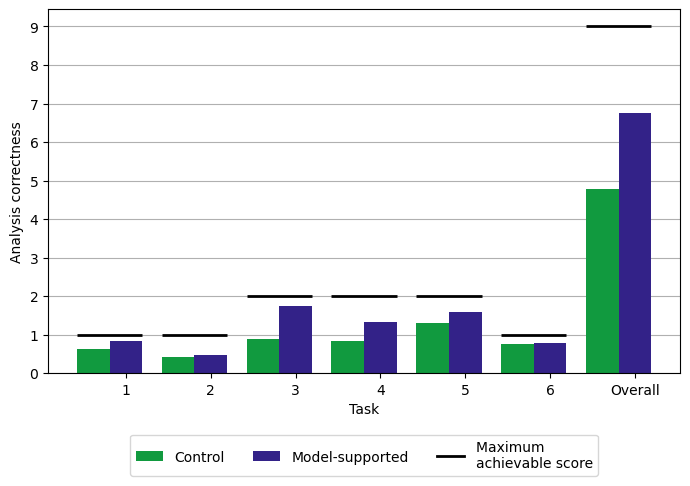

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D

# Manually provide the data
labels = ("1", "2", "3", "4", "5", "6", "Overall")
max_scores = [1, 1, 2, 2, 2, 1, 9]
scores_with_DFD = [avg_score_dfd_task1, 
                   avg_score_dfd_task2, 
                   avg_score_dfd_task3, 
                   avg_score_dfd_task4, 
                   avg_score_dfd_task5, 
                   avg_score_dfd_task6, 
                   avg_score_dfd_overall]
scores_without_DFD = [avg_score_no_dfd_task1, 
                      avg_score_no_dfd_task2, 
                      avg_score_no_dfd_task3, 
                      avg_score_no_dfd_task4, 
                      avg_score_no_dfd_task5, 
                      avg_score_no_dfd_task6, 
                      avg_score_no_dfd_overall]

    
# Combine the data into a dictionary
resource_usage = {"Control": scores_without_DFD, "Model-supported": scores_with_DFD}

# Choose a color palette
#palette = sns.color_palette("cubehelix")
palette = ["#119A3F", "#332288"]

fig, ax = plt.subplots(figsize=(7, 5))


num_tasks = len(labels)

bar_width = 0.25  # Adjust the width of the bars
gap_width = 0.15  # Adjust the width of the gaps between pairs of bars

# Create empty lists to store handles and labels
handles = []
legend_labels = []

# Create an array with positions for the bars
positions = np.arange(num_tasks) * (bar_width * 2 + gap_width)

for index, (boolean, resource) in enumerate(resource_usage.items()):
    color = palette[index % len(palette)]
    # Adjust the positions of the bars based on the index
    task_positions = positions + index * bar_width
    p = ax.bar(task_positions, resource, bar_width, label=boolean, color=color)
    # Append the handle (p) and the label (boolean) to the lists
    handles.append(p)
    legend_labels.append(boolean)

for task_position, max_score in zip(positions, max_scores):
    ax.hlines(max_score, task_position - bar_width / 2, task_position + bar_width * 2 - bar_width / 2, colors='k', linewidth=2, linestyles='solid')

    
#ax.set_title("Average score with / without provided DFD.")

# Set axis labels
ax.set_xlabel("Task")
ax.set_ylabel("Analysis correctness")

# Update x-axis tick positions and labels
ax.set_xticks(positions + bar_width)
ax.set_xticklabels(labels)

ax.set_yticks(np.arange(0, 10, 1.0))
ax.grid(axis = 'y')
ax.set_axisbelow(True)

# Create a Line2D object for the maximum achievable score lines
max_score_line = Line2D([0], [0], color='k', linewidth=2, linestyle='solid', label='Maximum \nachievable score')

# Add the Line2D object to the list of handles and legend labels
handles.append(max_score_line)
legend_labels.append(max_score_line.get_label())

# Reorder the handles and labels as desired
desired_order = [0, 1, 2]
handles = [handles[i] for i in desired_order]
legend_labels = [legend_labels[i] for i in desired_order]

# Create a custom legend with the specified order and place it outside the figure
ax.legend(handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol = 3)

plt.tight_layout()
plt.savefig("average_score_plot.png", dpi=900)
plt.show()


##### Plotting Evidence

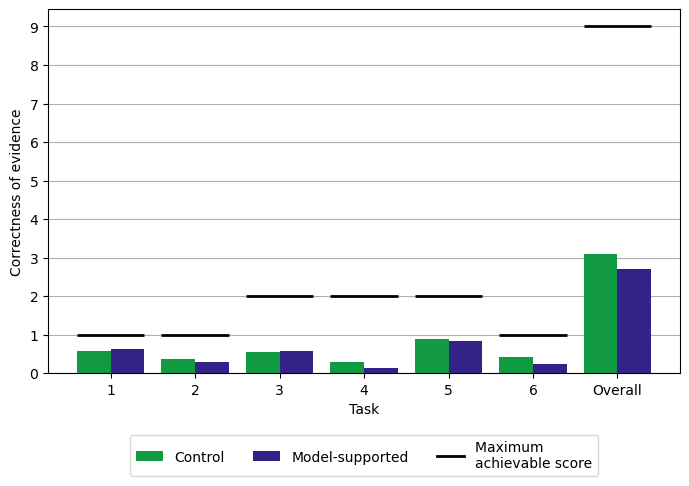

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D

# Manually provide the data
labels = ("1", "2", "3", "4", "5", "6", "Overall")
max_scores = [1, 1, 2, 2, 2, 1, 9]
evidence_with_DFD = [avg_evidence_dfd_task1, 
                   avg_evidence_dfd_task2, 
                   avg_evidence_dfd_task3, 
                   avg_evidence_dfd_task4, 
                   avg_evidence_dfd_task5, 
                   avg_evidence_dfd_task6, 
                   avg_evidence_dfd_overall]
evidence_without_DFD = [avg_evidence_no_dfd_task1, 
                      avg_evidence_no_dfd_task2, 
                      avg_evidence_no_dfd_task3, 
                      avg_evidence_no_dfd_task4, 
                      avg_evidence_no_dfd_task5, 
                      avg_evidence_no_dfd_task6, 
                      avg_evidence_no_dfd_overall]

    
# Combine the data into a dictionary
resource_usage = {"Control": evidence_without_DFD, "Model-supported": evidence_with_DFD}

# Choose a color palette
#palette = sns.color_palette("cubehelix")
palette = ["#119A3F", "#332288"]

fig, ax = plt.subplots(figsize=(7, 5))

num_tasks = len(labels)

bar_width = 0.4  # Adjust the width of the bars
gap_width = 0.2  # Adjust the width of the gaps between pairs of bars

# Create empty lists to store handles and labels
handles = []
legend_labels = []

# Create an array with positions for the bars
positions = np.arange(num_tasks) * (bar_width * 2 + gap_width)

for index, (boolean, resource) in enumerate(resource_usage.items()):
    color = palette[index % len(palette)]
    # Adjust the positions of the bars based on the index
    task_positions = positions + index * bar_width
    p = ax.bar(task_positions, resource, bar_width, label=boolean, color=color)
    # Append the handle (p) and the label (boolean) to the lists
    handles.append(p)
    legend_labels.append(boolean)

for task_position, max_score in zip(positions, max_scores):
    ax.hlines(max_score, task_position - bar_width / 2, task_position + bar_width * 2 - bar_width / 2, colors='k', linewidth=2, linestyles='solid')

    
#ax.set_title("Average score with / without provided DFD.")

# Set axis labels
ax.set_xlabel("Task")
ax.set_ylabel("Correctness of evidence")

ax.set_yticks(np.arange(0, 10, 1.0))
ax.grid(axis = 'y')
ax.set_axisbelow(True)

# Update x-axis tick positions and labels
ax.set_xticks(positions + bar_width / 2)
ax.set_xticklabels(labels)

# Create a Line2D object for the maximum achievable score lines
max_score_line = Line2D([0], [0], color='k', linewidth=2, linestyle='solid', label='Maximum \nachievable score')

# Add the Line2D object to the list of handles and legend labels
handles.append(max_score_line)
legend_labels.append(max_score_line.get_label())

# Reorder the handles and labels as desired
desired_order = [0, 1, 2]
handles = [handles[i] for i in desired_order]
legend_labels = [legend_labels[i] for i in desired_order]

# Create a custom legend with the specified order and place it outside the figure
ax.legend(handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol = 3)

plt.tight_layout()
plt.savefig("average_evidence_plot.png", dpi=900)
plt.show()


### Usage of provided resources

Reported usage of the provided resources

Create a dictionary to be plotted that contains the frequency of each resource usage per task.

In [148]:
resource_usage = dict()

none_used_list, documentation_used_list = list(), list()
code_used_list, dfd_used_list, traceability_used_list = list(), list(), list()

for answer in ["Task1_resource", "Task2_resource", "Task3_resource", "Task4_resource", "Task5_resource", "Task6_resource"]:
    none_used, documentation_used, code_used, dfd_used, traceability_used = 0, 0, 0, 0, 0
    for line_nr in range(len(df_dfd)):
        if "0" in str(df_dfd[answer][line_nr]):
            none_used += 1
        if "1" in str(df_dfd[answer][line_nr]):
            documentation_used += 1
        if "2" in str(df_dfd[answer][line_nr]):
            code_used += 1
        if "3" in str(df_dfd[answer][line_nr]):
            dfd_used += 1
        if "4" in str(df_dfd[answer][line_nr]):
            traceability_used += 1
    none_used_list.append(none_used)
    documentation_used_list.append(documentation_used)
    code_used_list.append(code_used)
    dfd_used_list.append(dfd_used)
    traceability_used_list.append(traceability_used)

resource_usage["None or could not Answer"] = np.array(none_used_list)
resource_usage["Textual Description"] = np.array(documentation_used_list)
resource_usage["Source Code"] = np.array(code_used_list)
resource_usage["Dataflow Diagram"] = np.array(dfd_used_list)
resource_usage["Traceability Information"] = np.array(traceability_used_list)

In [77]:
print("Total answers \"None or could not Answer\": ", sum(resource_usage["None or could not Answer"]))
print("Total answers \"Documentation\": ", sum(resource_usage["Textual Description"]))
print("Total answers \"Source Code\": ", sum(resource_usage["Source Code"]))
print("Total answers \"Dataflow Diagram\": ", sum(resource_usage["Dataflow Diagram"]))
print("Total answers \"Traceability\": ", sum(resource_usage["Traceability Information"]))

Total answers "None or could not Answer":  1
Total answers "Documentation":  21
Total answers "Source Code":  55
Total answers "Dataflow Diagram":  88
Total answers "Traceability":  43


In [78]:
import seaborn as sns

(0.3292772926340829, 0.4762845556584382, 0.1837155549758328)
(0.6328422475018423, 0.4747981096220677, 0.29070209208025455)
(0.8146245329198283, 0.49548316572322215, 0.5752525936416857)
(0.812420762188067, 0.6167295569758052, 0.8578575836301946)
(0.7587183008012618, 0.7922069335474338, 0.9543861221913403)


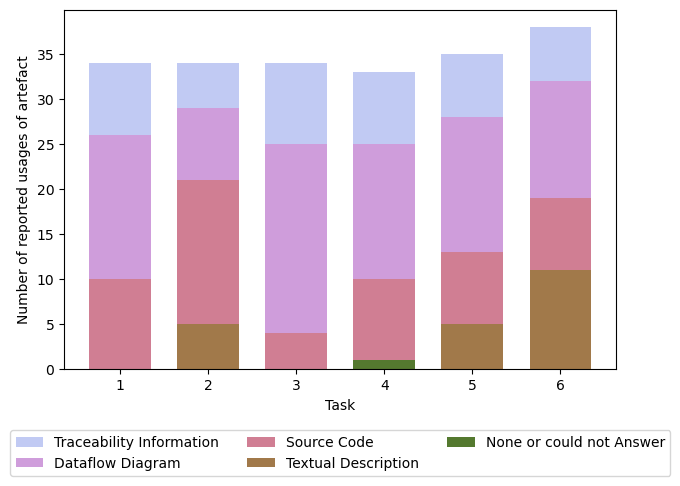

In [149]:
fig, ax = plt.subplots(figsize=(7, 5))

labels = ("1", "2", "3", "4", "5", "6")

bottom = np.zeros(6)
width = 0.7

handles = []
legend_labels = []
palette = sns.color_palette("cubehelix", 9)

for index, (boolean, resource) in enumerate(resource_usage.items()):
    color = palette[(index % len(palette)) + 3]
    print(color)
    p = ax.bar(labels, resource, width, label=boolean, bottom=bottom, color=color)
    bottom += resource
    
    handles.append(p)
    legend_labels.append(boolean)

#ax.set_title("Number of reported usage of the provided resources.")

ax.set_xlabel("Task")
ax.set_ylabel("Number of reported usages of artefact")

desired_order = [4, 3, 2, 1, 0]
handles = [handles[i] for i in desired_order]
legend_labels = [legend_labels[i] for i in desired_order]

ax.legend(handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol = 3)

plt.tight_layout()
plt.savefig("resource_usage_plot.png", dpi=900)
plt.show()

### Checking for correlation between resource usage and score

For each resource, we separate the participants into:
    - Group A = those that gave that resource more than 50% as answer to the questions of which resource was used
    - Group B = the others
Then, we compare the average scores of the two groups.

In [37]:
number_none_users, number_non_none_users = 0, 0
score_none_users, score_non_none_users = 0, 0

number_documentation_users, number_non_documentation_users = 0, 0
score_documentation_users, score_non_documentation_users = 0, 0

number_code_users, number_non_code_users = 0, 0
score_code_users, score_non_code_users = 0, 0

number_dfd_users, number_non_dfd_users = 0, 0
score_dfd_users, score_non_dfd_users = 0, 0

number_traceability_users, number_non_traceability_users = 0, 0
score_traceability_users, score_non_traceability_users = 0, 0

for line_nr in range(len(df_dfd)):
    # number of "DFD" answers in questions for resource
    none_uses, documentation_uses, code_uses, dfd_uses, traceability_uses  = 0, 0, 0, 0, 0
    for answer in ["Task1_resource", "Task2_resource", "Task3_resource", "Task4_resource", "Task5_resource", "Task6_resource"]:
        if "0" in str(df_dfd[answer][line_nr]):
            none_uses += 1
        if "1" in str(df_dfd[answer][line_nr]):
            documentation_uses += 1
        if "2" in str(df_dfd[answer][line_nr]):
            code_uses += 1
        if "3" in str(df_dfd[answer][line_nr]):
            dfd_uses += 1
        if "4" in str(df_dfd[answer][line_nr]):
            traceability_uses += 1
    # if number of usages if 4 or higher (i.e. above 50%) for a given resource, add that participant's score to one var, else to another.
    # none
    if none_uses >= 4:
        number_none_users += 1
        for answer in ["Task1_analysis_correctness", "Task2_analysis_correctness", "Task3_analysis_correctness", "Task4_analysis_correctness", "Task5_analysis_correctness", "Task6_analysis_correctness"]:
            score_none_users += df_dfd[answer][line_nr]
    else:
        number_non_none_users += 1
        for answer in ["Task1_analysis_correctness", "Task2_analysis_correctness", "Task3_analysis_correctness", "Task4_analysis_correctness", "Task5_analysis_correctness", "Task6_analysis_correctness"]:
            score_non_none_users += df_dfd[answer][line_nr]
    
    # documentation
    if documentation_uses >= 4:
        number_documentation_users += 1
        for answer in ["Task1_analysis_correctness", "Task2_analysis_correctness", "Task3_analysis_correctness", "Task4_analysis_correctness", "Task5_analysis_correctness", "Task6_analysis_correctness"]:
            score_documentation_users += df_dfd[answer][line_nr]
    else:
        number_non_documentation_users += 1
        for answer in ["Task1_analysis_correctness", "Task2_analysis_correctness", "Task3_analysis_correctness", "Task4_analysis_correctness", "Task5_analysis_correctness", "Task6_analysis_correctness"]:
            score_non_documentation_users += df_dfd[answer][line_nr]
    
    # code
    if code_uses >= 4:
        number_code_users += 1
        for answer in ["Task1_analysis_correctness", "Task2_analysis_correctness", "Task3_analysis_correctness", "Task4_analysis_correctness", "Task5_analysis_correctness", "Task6_analysis_correctness"]:
            score_code_users += df_dfd[answer][line_nr]
    else:
        number_non_code_users += 1
        for answer in ["Task1_analysis_correctness", "Task2_analysis_correctness", "Task3_analysis_correctness", "Task4_analysis_correctness", "Task5_analysis_correctness", "Task6_analysis_correctness"]:
            score_non_code_users += df_dfd[answer][line_nr]
    
    # dfd
    if dfd_uses >= 4:
        number_dfd_users += 1
        for answer in ["Task1_analysis_correctness", "Task2_analysis_correctness", "Task3_analysis_correctness", "Task4_analysis_correctness", "Task5_analysis_correctness", "Task6_analysis_correctness"]:
            score_dfd_users += df_dfd[answer][line_nr]
    else:
        number_non_dfd_users += 1
        for answer in ["Task1_analysis_correctness", "Task2_analysis_correctness", "Task3_analysis_correctness", "Task4_analysis_correctness", "Task5_analysis_correctness", "Task6_analysis_correctness"]:
            score_non_dfd_users += df_dfd[answer][line_nr]
            
    # traceability
    if traceability_uses >= 4:
        number_traceability_users += 1
        for answer in ["Task1_analysis_correctness", "Task2_analysis_correctness", "Task3_analysis_correctness", "Task4_analysis_correctness", "Task5_analysis_correctness", "Task6_analysis_correctness"]:
            score_traceability_users += df_dfd[answer][line_nr]
    else:
        number_non_traceability_users += 1
        for answer in ["Task1_analysis_correctness", "Task2_analysis_correctness", "Task3_analysis_correctness", "Task4_analysis_correctness", "Task5_analysis_correctness", "Task6_analysis_correctness"]:
            score_non_traceability_users += df_dfd[answer][line_nr]
#    print(dfd_uses, score_dfd_users)

average_score_code_users = score_code_users / number_code_users
average_score_non_code_users = score_non_code_users / number_non_code_users

average_score_dfd_users = score_dfd_users / number_dfd_users
average_score_non_dfd_users = score_non_dfd_users / number_non_dfd_users

average_score_traceability_users = score_traceability_users / number_traceability_users
average_score_non_traceability_users = score_non_traceability_users / number_non_traceability_users

print(f"Number code users: {number_code_users}")
print(f"Average score code users: {average_score_code_users}")
print(f"Average score non-code users: {average_score_non_code_users}")
print(f"Increase of: {((average_score_code_users / average_score_non_code_users) - 1) * 100}%")
print("\n")
print(f"Number dfd users: {number_dfd_users}")
print(f"Average score DFD users: {average_score_dfd_users}")
print(f"Average score non-DFD users: {average_score_non_dfd_users}")
print(f"Increase of: {((average_score_dfd_users / average_score_non_dfd_users) - 1) * 100}%")
print("\n")
print(f"Number traceability users: {number_traceability_users}")
print(f"Average score traceability users: {average_score_traceability_users}")
print(f"Average score non-traceability users: {average_score_non_traceability_users}")
print(f"Increase of: {((average_score_traceability_users / average_score_non_traceability_users) - 1) * 100}%")


Number code users: 6
Average score code users: 5.833333333333333
Average score non-code users: 7.055555555555555
Increase of: -17.322834645669293%


Number dfd users: 15
Average score DFD users: 7.266666666666667
Average score non-DFD users: 5.888888888888889
Increase of: 23.396226415094333%


Number traceability users: 7
Average score traceability users: 7.285714285714286
Average score non-traceability users: 6.529411764705882
Increase of: 11.583011583011583%


(Out of a possible score of 6 maximum)

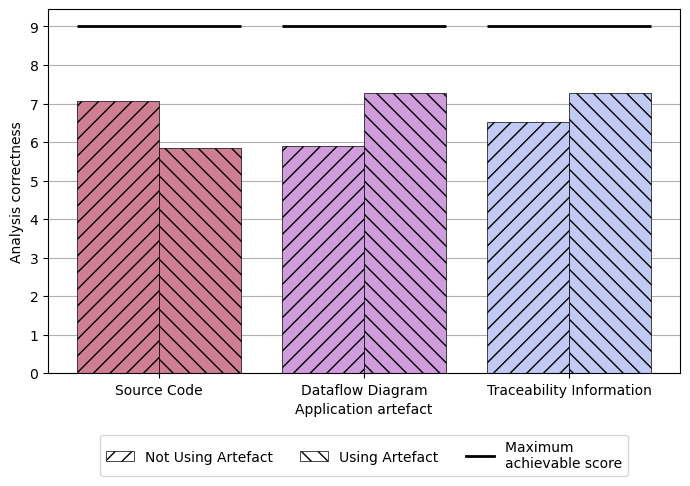

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D

# Manually provide the data
labels = ("Source Code", "Dataflow Diagram", "Traceability Information")
max_scores = [9, 9, 9]
scores_group_a = [average_score_code_users, 
                    average_score_dfd_users, 
                    average_score_traceability_users]
scores_group_b = [average_score_non_code_users, 
                    average_score_non_dfd_users, 
                    average_score_non_traceability_users]

    
# Combine the data into a dictionary
resource_usage = {"Not Using Artefact": scores_group_b, "Using Artefact": scores_group_a}

# Choose a color palette
palette = [(0.8146245329198283, 0.49548316572322215, 0.5752525936416857),
            (0.812420762188067, 0.6167295569758052, 0.8578575836301946),
            (0.7587183008012618, 0.7922069335474338, 0.9543861221913403)]

fig, ax = plt.subplots(figsize=(7, 5))

num_resources = len(labels)

bar_width = 0.4  # Adjust the width of the bars
gap_width = 0.2  # Adjust the width of the gaps between pairs of bars

# Create empty lists to store handles and labels
handles = []
legend_labels = []

# Create an array with positions for the bars
positions = np.arange(num_resources) * (bar_width * 2 + gap_width)

for index, (boolean, resource) in enumerate(resource_usage.items()):
    hatch = ["//", "\\\\"][index]
    
    # Adjust the positions of the bars based on the index
    for i, (label, value) in enumerate(zip(labels, resource)):
        color = palette[i]
        resource_positions = positions[i] + index * bar_width
        p = ax.bar(resource_positions, value, bar_width, label=boolean, color=color, hatch=hatch, edgecolor='black', linewidth=0.5)
        
    # Append the handle (p) and the label (boolean) to the lists
    handles.append(p)
    legend_labels.append(boolean)

for resource_position, max_score in zip(positions, max_scores):
    ax.hlines(max_score, resource_position - bar_width / 2, resource_position + bar_width * 2 - bar_width / 2, colors='k', linewidth=2, linestyles='solid')

    
#ax.set_title("Average score with / without provided DFD.")

# Set axis labels
ax.set_xlabel("Application artefact")
ax.set_ylabel("Analysis correctness")

# Update x-axis tick positions and labels
ax.set_xticks(positions + bar_width / 2)
ax.set_xticklabels(labels)

ax.set_yticks(np.arange(0, 10, 1.0))
ax.grid(axis = 'y')
ax.set_axisbelow(True)

# Create a Line2D object for the maximum achievable score lines
max_score_line = Line2D([0], [0], color='k', linewidth=2, linestyle='solid', label='Maximum \nachievable score')

# Add the Line2D object to the list of handles and legend labels
handles.append(max_score_line)
legend_labels.append(max_score_line.get_label())

# Reorder the handles and labels as desired
desired_order = [0, 1, 2]
handles = [handles[i] for i in desired_order]
legend_labels = [legend_labels[i] for i in desired_order]

# Create a custom legend with the specified order and place it outside the figure
ax.legend(handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol = 3)

# Remove color from legend entries
legend = ax.legend(
    handles,
    legend_labels,  # Use legend_labels that include boolean and hatch
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=3,
)
for handle in legend.legend_handles[:2]:
    handle.set_facecolor('none')


plt.tight_layout()
plt.savefig("average_score_resources.svg", dpi=900)
plt.show()


### Checking for correlation between resource usage and Evidence

For each resource, we separate the participants into:
    - Group A = those that gave that resource more than 50% as answer to the questions of which resource was used
    - Group B = the others
Then, we compare the average scores of the two groups.

In [44]:
number_none_users, number_non_none_users = 0, 0
evidence_none_users, evidence_non_none_users = 0, 0

number_documentation_users, number_non_documentation_users = 0, 0
evidence_documentation_users, evidence_non_documentation_users = 0, 0

number_code_users, number_non_code_users = 0, 0
evidence_code_users, evidence_non_code_users = 0, 0

number_dfd_users, number_non_dfd_users = 0, 0
evidence_dfd_users, evidence_non_dfd_users = 0, 0

number_traceability_users, number_non_traceability_users = 0, 0
evidence_traceability_users, evidence_non_traceability_users = 0, 0

for line_nr in range(len(df_dfd)):
    # number of "DFD" answers in questions for resource
    none_uses, documentation_uses, code_uses, dfd_uses, traceability_uses  = 0, 0, 0, 0, 0
    for answer in ["Task1_resource", "Task2_resource", "Task3_resource", "Task4_resource", "Task5_resource", "Task6_resource"]:
        if "0" in str(df_dfd[answer][line_nr]):
            none_uses += 1
        if "1" in str(df_dfd[answer][line_nr]):
            documentation_uses += 1
        if "2" in str(df_dfd[answer][line_nr]):
            code_uses += 1
        if "3" in str(df_dfd[answer][line_nr]):
            dfd_uses += 1
        if "4" in str(df_dfd[answer][line_nr]):
            traceability_uses += 1
    # if number of usages if 4 or higher (i.e. above 50%) for a given resource, add that participant's score to one var, else to another.
    # none
    if none_uses >= 4:
        number_none_users += 1
        for answer in ["Task1_correctness_of_evidence", "Task2_correctness_of_evidence", "Task3_correctness_of_evidence", "Task4_correctness_of_evidence", "Task5_correctness_of_evidence", "Task6_correctness_of_evidence"]:
            evidence_none_users += df_dfd[answer][line_nr]
    else:
        number_non_none_users += 1
        for answer in ["Task1_correctness_of_evidence", "Task2_correctness_of_evidence", "Task3_correctness_of_evidence", "Task4_correctness_of_evidence", "Task5_correctness_of_evidence", "Task6_correctness_of_evidence"]:
            evidence_non_none_users += df_dfd[answer][line_nr]
    
    # documentation
    if documentation_uses >= 4:
        number_documentation_users += 1
        for answer in ["Task1_correctness_of_evidence", "Task2_correctness_of_evidence", "Task3_correctness_of_evidence", "Task4_correctness_of_evidence", "Task5_correctness_of_evidence", "Task6_correctness_of_evidence"]:
            evidence_documentation_users += df_dfd[answer][line_nr]
    else:
        number_non_documentation_users += 1
        for answer in ["Task1_correctness_of_evidence", "Task2_correctness_of_evidence", "Task3_correctness_of_evidence", "Task4_correctness_of_evidence", "Task5_correctness_of_evidence", "Task6_correctness_of_evidence"]:
            evidence_non_documentation_users += df_dfd[answer][line_nr]
    
    # code
    if code_uses >= 4:
        number_code_users += 1
        for answer in ["Task1_correctness_of_evidence", "Task2_correctness_of_evidence", "Task3_correctness_of_evidence", "Task4_correctness_of_evidence", "Task5_correctness_of_evidence", "Task6_correctness_of_evidence"]:
            evidence_code_users += df_dfd[answer][line_nr]
    else:
        number_non_code_users += 1
        for answer in ["Task1_correctness_of_evidence", "Task2_correctness_of_evidence", "Task3_correctness_of_evidence", "Task4_correctness_of_evidence", "Task5_correctness_of_evidence", "Task6_correctness_of_evidence"]:
            evidence_non_code_users += df_dfd[answer][line_nr]
    
    # dfd
    if dfd_uses >= 4:
        number_dfd_users += 1
        for answer in ["Task1_correctness_of_evidence", "Task2_correctness_of_evidence", "Task3_correctness_of_evidence", "Task4_correctness_of_evidence", "Task5_correctness_of_evidence", "Task6_correctness_of_evidence"]:
            evidence_dfd_users += df_dfd[answer][line_nr]
    else:
        number_non_dfd_users += 1
        for answer in ["Task1_correctness_of_evidence", "Task2_correctness_of_evidence", "Task3_correctness_of_evidence", "Task4_correctness_of_evidence", "Task5_correctness_of_evidence", "Task6_correctness_of_evidence"]:
            evidence_non_dfd_users += df_dfd[answer][line_nr]
            
    # traceability
    if traceability_uses >= 4:
        number_traceability_users += 1
        for answer in ["Task1_correctness_of_evidence", "Task2_correctness_of_evidence", "Task3_correctness_of_evidence", "Task4_correctness_of_evidence", "Task5_correctness_of_evidence", "Task6_correctness_of_evidence"]:
            evidence_traceability_users += df_dfd[answer][line_nr]
    else:
        number_non_traceability_users += 1
        for answer in ["Task1_correctness_of_evidence", "Task2_correctness_of_evidence", "Task3_correctness_of_evidence", "Task4_correctness_of_evidence", "Task5_correctness_of_evidence", "Task6_correctness_of_evidence"]:
            evidence_non_traceability_users += df_dfd[answer][line_nr]
#    print(dfd_uses, score_dfd_users)

average_evidence_code_users = evidence_code_users / number_code_users
average_evidence_non_code_users = evidence_non_code_users / number_non_code_users

average_evidence_dfd_users = evidence_dfd_users / number_dfd_users
average_evidence_non_dfd_users = evidence_non_dfd_users / number_non_dfd_users

average_evidence_traceability_users = evidence_traceability_users / number_traceability_users
average_evidence_non_traceability_users = evidence_non_traceability_users / number_non_traceability_users

print(f"Number code users: {number_code_users}")
print(f"Average evidence code users: {average_evidence_code_users}")
print(f"Average evidence non-code users: {average_evidence_non_code_users}")
print(f"Increase of: {((average_evidence_code_users / average_evidence_non_code_users) - 1) * 100}%")
print("\n")
print(f"Number DFD users: {number_dfd_users}")
print(f"Average evidence DFD users: {average_evidence_dfd_users}")
print(f"Average evidence non-DFD users: {average_evidence_non_dfd_users}")
print(f"Increase of: {((average_evidence_dfd_users / average_evidence_non_dfd_users) - 1) * 100}%")
print("\n")
print(f"Number traceability users: {number_traceability_users}")
print(f"Average evidence traceability users: {average_evidence_traceability_users}")
print(f"Average evidence non-traceability users: {average_evidence_non_traceability_users}")
print(f"Increase of: {((average_evidence_traceability_users / average_evidence_non_traceability_users) - 1) * 100}%")


Number code users: 6
Average evidence code users: 3.0
Average evidence non-code users: 2.611111111111111
Increase of: 14.893617021276583%


Number DFD users: 15
Average evidence DFD users: 2.466666666666667
Average evidence non-DFD users: 3.111111111111111
Increase of: -20.714285714285708%


Number traceability users: 7
Average evidence traceability users: 5.857142857142857
Average evidence non-traceability users: 1.411764705882353
Increase of: 314.8809523809523%


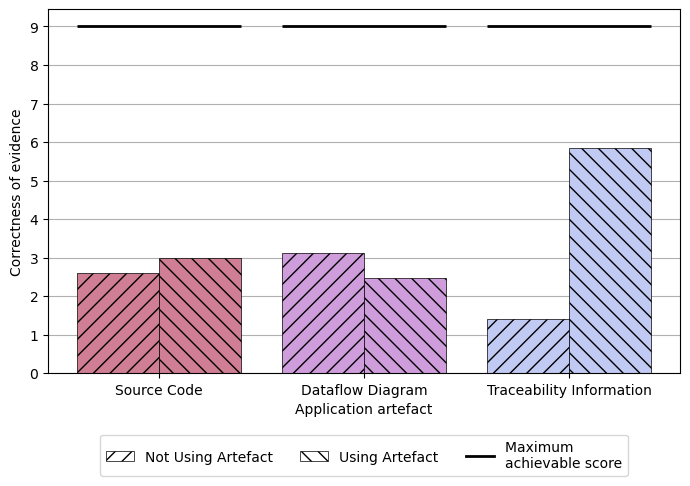

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D

# Manually provide the data
labels = ("Source Code", "Dataflow Diagram", "Traceability Information")
max_scores = [9, 9, 9]
evidence_group_a = [average_evidence_code_users, 
                    average_evidence_dfd_users, 
                    average_evidence_traceability_users]
evidence_group_b = [average_evidence_non_code_users, 
                    average_evidence_non_dfd_users, 
                    average_evidence_non_traceability_users]

    
# Combine the data into a dictionary
resource_usage = {"Not Using Artefact": evidence_group_b, "Using Artefact": evidence_group_a}

# Choose a color palette
palette = [(0.8146245329198283, 0.49548316572322215, 0.5752525936416857),
            (0.812420762188067, 0.6167295569758052, 0.8578575836301946),
            (0.7587183008012618, 0.7922069335474338, 0.9543861221913403)]

fig, ax = plt.subplots(figsize=(7, 5))

num_resources = len(labels)

bar_width = 0.4  # Adjust the width of the bars
gap_width = 0.2  # Adjust the width of the gaps between pairs of bars

# Create empty lists to store handles and labels
handles = []
legend_labels = []

# Create an array with positions for the bars
positions = np.arange(num_resources) * (bar_width * 2 + gap_width)

for index, (boolean, resource) in enumerate(resource_usage.items()):
    hatch = ["//", "\\\\"][index]
    
    # Adjust the positions of the bars based on the index
    for i, (label, value) in enumerate(zip(labels, resource)):
        color = palette[i]
        resource_positions = positions[i] + index * bar_width
        p = ax.bar(resource_positions, value, bar_width, label=boolean, color=color, hatch=hatch, edgecolor='black', linewidth=0.5)
        
    # Append the handle (p) and the label (boolean) to the lists
    handles.append(p)
    legend_labels.append(boolean)

for resource_position, max_score in zip(positions, max_scores):
    ax.hlines(max_score, resource_position - bar_width / 2, resource_position + bar_width * 2 - bar_width / 2, colors='k', linewidth=2, linestyles='solid')

# Set axis labels
ax.set_xlabel("Application artefact")
ax.set_ylabel("Correctness of evidence")

# Update x-axis tick positions and labels
ax.set_xticks(positions + bar_width / 2)
ax.set_xticklabels(labels)

ax.set_yticks(np.arange(0, 10, 1.0))
ax.grid(axis = 'y')
ax.set_axisbelow(True)

# Create a Line2D object for the maximum achievable score lines
max_score_line = Line2D([0], [0], color='k', linewidth=2, linestyle='solid', label='Maximum \nachievable score')

# Add the Line2D object to the list of handles and legend labels
handles.append(max_score_line)
legend_labels.append(max_score_line.get_label())

# Reorder the handles and labels as desired
desired_order = [0, 1, 2]
handles = [handles[i] for i in desired_order]
legend_labels = [legend_labels[i] for i in desired_order]

# Create a custom legend with the specified order and place it outside the figure
ax.legend(handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol = 3)

# Remove color from legend entries
legend = ax.legend(
    handles,
    legend_labels,  # Use legend_labels that include boolean and hatch
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=3,
)
for handle in legend.legend_handles[:2]:
    handle.set_facecolor('none')
    
plt.tight_layout()
plt.savefig("average_evidence_resources.svg", dpi=900)
plt.show()


### Time

We split the participants into three groups according to their achieved score (out of a possible 12, sum of tasks with DFD and without). We then compute the average time each group worked on the tasks to see if there is a correlation between time spent and score

In [179]:
time_group_low, time_group_medium, time_group_high = 0, 0, 0
scores = list()
for line_nr in range(len(df_dfd)):
    participant_score = 0
    for score in ["Task1_analysis_correctness", "Task2_analysis_correctness", "Task3_analysis_correctness", "Task4_analysis_correctness", "Task5_analysis_correctness", "Task6_analysis_correctness"]:
        participant_score += df_dfd[score][line_nr]
        participant_score += df_no_dfd[score][line_nr]
    scores.append(participant_score)
    

1     52.0
2     27.0
3     28.0
4     40.0
5     39.0
6     42.0
7     28.0
8     47.0
9     17.0
10    15.0
11    20.0
12    43.0
13    22.0
14    58.0
15    38.0
16    18.0
17    11.0
18    41.0
19    17.0
20    47.0
21    28.0
22    40.0
23    54.0
Name: Time (minutes), dtype: float64


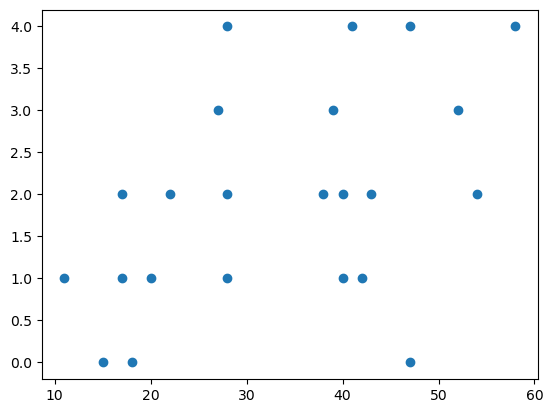

In [184]:
a = df_no_dfd["Time (minutes)"][1:]
b = df_dfd_overall_evidence[1:]

print(a)
plt.scatter(a, b)
plt.savefig("scatterplot_time.png", dpi=900)
plt.show()